<base href="https://github.com/PavlyukovVladimir/SMPR3/blob/master/">

# Тема: «Внутренние и внешние критерии»
## «Эффект перобучения»
<a name="oggl"></a> <a id='ogl'></a>
* <B><a href="#vnuvne">Реализовать какой-либо внешний и внутренний критерии качества.</a></B>
* <B><a href="#graf">Показать на графике эффект переобучения.</a></B>
* <B><a href="#vivodi">Сделать выводы</a></B>

# Посмотрим на результаты работы 3х классификаторов: [Наивный Гауссовский](#bayes_cell), [К ближайших соседей](#k_neighbors_cell) и [Адабуст](#adabust_cell)

In [214]:
import numpy as np#массивы
import matplotlib.pyplot as plt#рисует графики
from matplotlib.colors import ListedColormap#карта цветов
from sklearn import datasets #демонстрационные выборки
from sklearn.naive_bayes import GaussianNB #Гауссовский алгоритм классификации
from sklearn.neighbors import KNeighborsClassifier #добавляем классификцию ближайших соседей
from sklearn.ensemble import AdaBoostClassifier #Адабуст алгоритм классификации
# загрузка данных "Ирисы фишера"
iris = datasets.load_iris()
y=iris.target # номера классов
X=iris.data[:,[0,3]] # 2 признака
h = .01  # шаг сетки
# создание цветовых карт
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<a id='bayes_cell'></a>

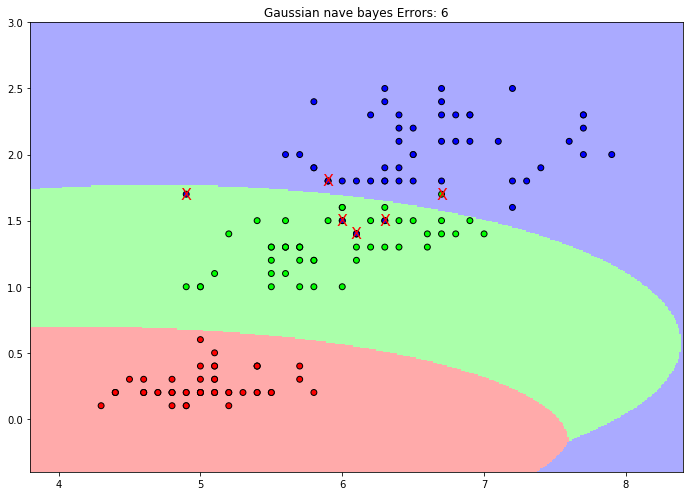

In [215]:
gnb = GaussianNB()
filtr= y!=gnb.fit(X, y).predict(X) # получим логический фильтр неправильно классифицированных элементов
#Для графического представления, найдем максимальные и минимальные значения признаков и увеличим(уменьшим) их на 1
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
# получим сетку
xx, yy = np.meshgrid(np.arange(x_min - 1, x_max + 1, h), np.arange(y_min - 1, y_max + 1, h))
# метод ravel "распутывает" матрицу в массив приставляя к первой строке вторую потом третью и т.д.
# метод c_ принимает два массива и превращает их в матрицу, где эти массивы столбцы
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицыруем сетку
# аргумент shape выдает форму матрицы (число строк, число столбцов)
# метод reshape принимает форму и переделывает в соответствии с ней
Z = Z.reshape(xx.shape)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация
axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
# раставляем элементы выборки кружками радиуса 35 с черным ободком
axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
XErr = X[filtr] # массив неправильноклассифицированных элементов
yErr = y[filtr] # соответствующие им правильные ответы
# зачеркиваем неправильтно классифицированные элементы красными "иксами"
for Er in XErr:
    axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min-0.5, x_max+0.5)
axs.set_ylim(y_min-0.5, y_max+0.5)
# добавление заголовка
axs.set_title("Gaussian nave bayes Errors: %i" % len(XErr))
plt.show()

<a name="vnuvne"></a>
# Реализовать какой-либо внешний и внутренний критерии качества:
[Возврат к оглавлению](#ogl)

## Внутренний критерий:

In [216]:
# контроль происходит на той же выборке на которой и обучение
X_train=X
y_train=y
X_test=X
y_test=y
ferr=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))/len(y_test)
ferr

0.04

## Внешний критерий:

In [217]:
# контроль происходит на данных не использованных в обучении
import random as rnd
rnd.seed('none')

In [236]:
N=len(X)
i_train=list(range(N))
rnd.shuffle(i_train)
print(i_train[0:85*N//100])
print(i_train[85*N//100:N])
X_train=X[i_train[0:N//5]]
y_train=y[i_train[0:N//5]]
X_test=X[i_train[N//5:N]]
y_test=y[i_train[N//5:N]]
ferr=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))/len(y_test)
ferr

[59, 142, 55, 119, 67, 9, 135, 79, 85, 115, 61, 49, 54, 84, 121, 117, 38, 126, 147, 113, 96, 123, 70, 5, 20, 66, 0, 120, 57, 86, 118, 58, 22, 4, 52, 69, 77, 125, 50, 83, 43, 71, 68, 72, 105, 137, 47, 37, 18, 94, 51, 34, 46, 116, 122, 24, 80, 99, 31, 74, 1, 97, 10, 40, 53, 82, 106, 7, 148, 128, 45, 109, 110, 127, 87, 8, 103, 62, 65, 19, 132, 26, 124, 111, 88, 145, 27, 33, 146, 56, 90, 107, 64, 73, 35, 92, 93, 3, 78, 13, 39, 130, 6, 89, 12, 100, 98, 136, 63, 25, 48, 144, 81, 140, 101, 102, 17, 129, 139, 134, 14, 15, 141, 108, 42, 75, 104]
[41, 138, 2, 44, 149, 16, 112, 36, 133, 91, 114, 60, 21, 131, 28, 76, 143, 95, 23, 11, 29, 32, 30]


0.05

<a id='adabust_cell'></a>

<a name="graf"></a>
# Показать на графике эффект переобучения:
[Возврат к оглавлению](#ogl)

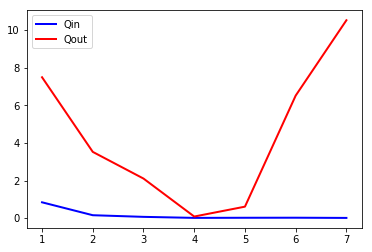

In [239]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

knc = KNeighborsClassifier()

def f(x):
    """Аппроксимируемая функция"""
    return 1.25**x

# создаем точки для графика
x_plot = np.linspace(0.1, 16.1, 161)
y_plot = f(x_plot)
# Обучающая выборка
X_train = np.linspace(1.0, 10.0, 10)
y_train = f(X_train)
# Контрольная выборка
X_test = np.linspace(5.5, 15.5, 10)
y_test = f(X_test)
# create matrix versions of these arrays
X = X_train[:, np.newaxis]
xp = x_plot[:, np.newaxis]
X_ts = X_test[:, np.newaxis]

lw = 2
nd = 7
n=np.arange(1,nd+1)
Qin=np.zeros(nd)
Qout=Qin.copy()
for degree in range(1,nd+1):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y_train)
    Qin[degree-1]=sum(abs(y_train - model.predict(X)))/nd
    Qout[degree-1]=sum(abs(f(X_test) - model.predict(X_ts)))/nd
plt.plot(n, Qin, color='blue', linewidth=lw, label="Qin")
plt.plot(n, Qout, color='red', linewidth=lw, label="Qout")
plt.legend(loc='upper left')

plt.show()

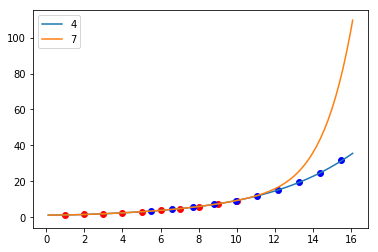

In [247]:
# plt.plot(x_plot, y_plot)
model = make_pipeline(PolynomialFeatures(4), Ridge())
model.fit(X, y_train)
plt.plot(x_plot, model.predict(xp),label="4")
model = make_pipeline(PolynomialFeatures(7), Ridge())
model.fit(X, y_train)
plt.plot(x_plot, model.predict(xp),label="7")
plt.scatter(X_train, y_train, c="red", s=35)
plt.scatter(X_test, y_test, c="blue", s=35)
plt.legend(loc='upper left')
plt.show()

<a name="vivodi"></a>
# Выводы:
<a href="#oggl">Возврат к оглавлению</a>

- Внутренний критерий минимизируется при обучении, поэтому ожидаемо, что на внешнем ошибки чаще
- видно, что полином 4й степени неплохо аппроксимирует функцию за пределами обучающей выборки, но с усложнением(повышением степени) полинома ошибки на контроле увеличиваются, при почти полном отсутствии их на обучающей выборке.